In [1]:
from rouge_scores_sim_visualization import *
import os
import pickle
import numpy as np

In [2]:
correlation_results_path = "../../correlation_results"

In [3]:
r1 = pickle.load(open(os.path.join(correlation_results_path, "r1_list"), "rb"))
r2 = pickle.load(open(os.path.join(correlation_results_path, "r2_list"), "rb"))
rl = pickle.load(open(os.path.join(correlation_results_path, "rl_list"), "rb"))
attentions = pickle.load(open(os.path.join(correlation_results_path, "attention_list"), "rb"))

In [4]:
correlation_matrix = np.load(os.path.join(correlation_results_path, "corr_matrix.npy"))
first_layers_correlation = np.load(os.path.join(correlation_results_path, "first_layers_correlation.npy"))
last_layers_correlation = np.load(os.path.join(correlation_results_path, "last_layers_correlation.npy"))

In [8]:
print(correlation_matrix)

[[1.         0.21565317 0.22075202 0.21472776]
 [1.         0.1862312  0.19585695 0.18253653]
 [1.         0.14520714 0.15754918 0.14665544]
 [1.         0.35869076 0.38829047 0.37057914]
 [1.         0.47110883 0.5383799  0.50507819]
 [1.         0.54959488 0.67315824 0.61270516]
 [1.         0.53456912 0.6656885  0.60332471]
 [1.         0.47967471 0.55238213 0.51476812]]


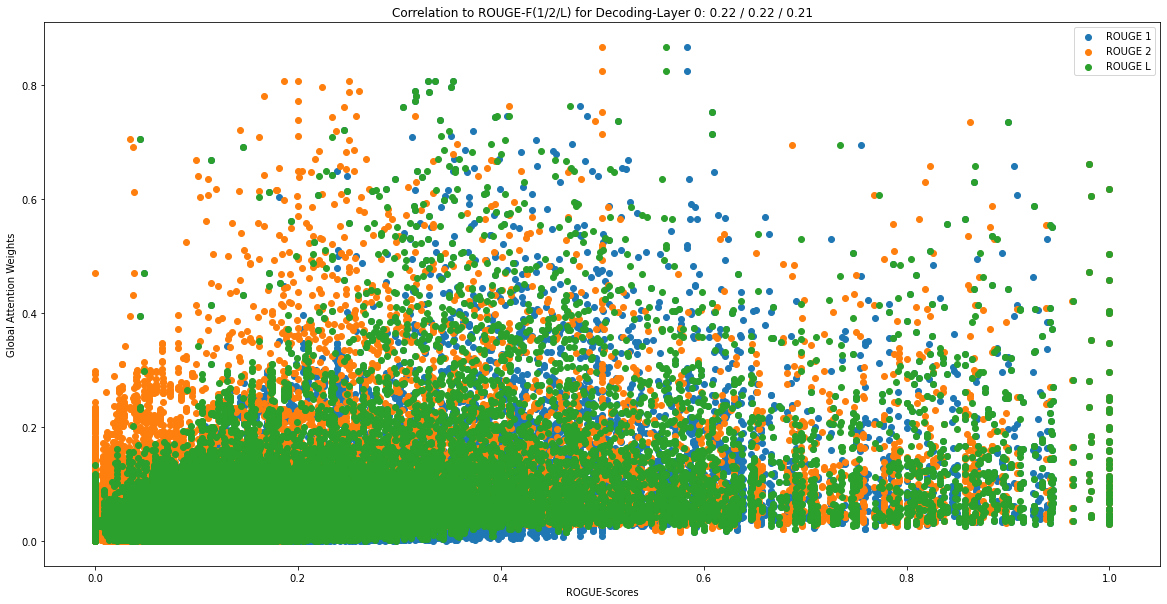

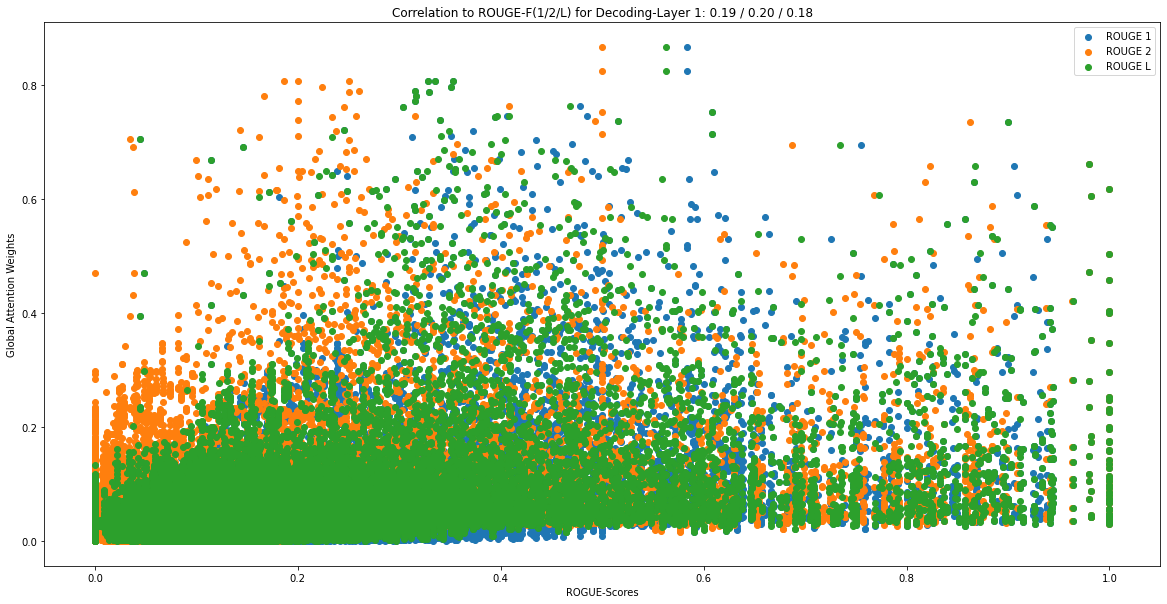

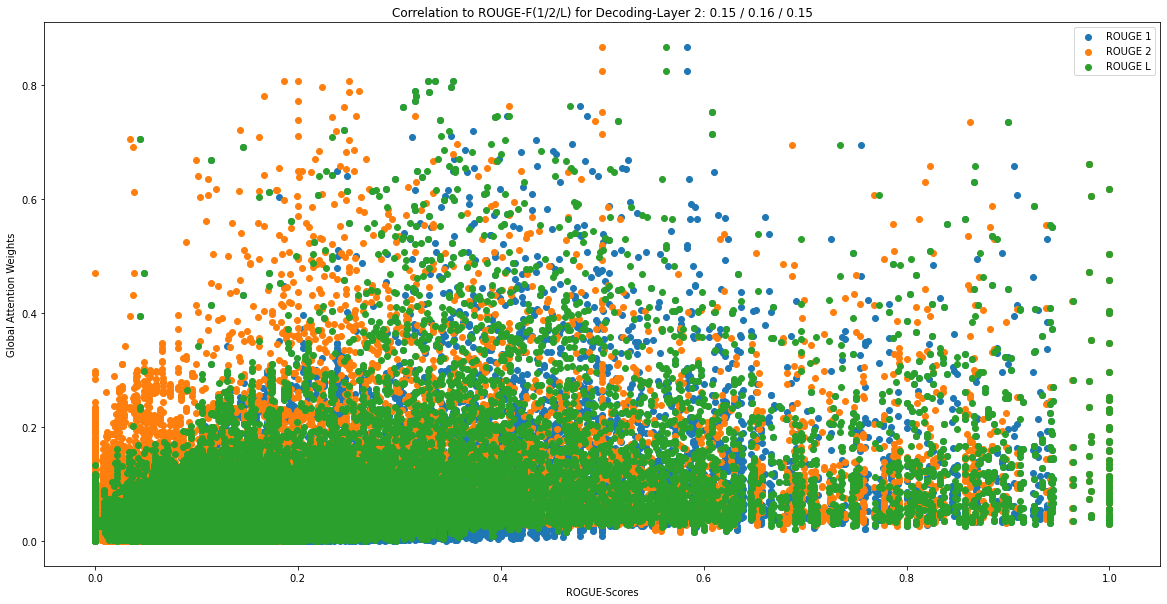

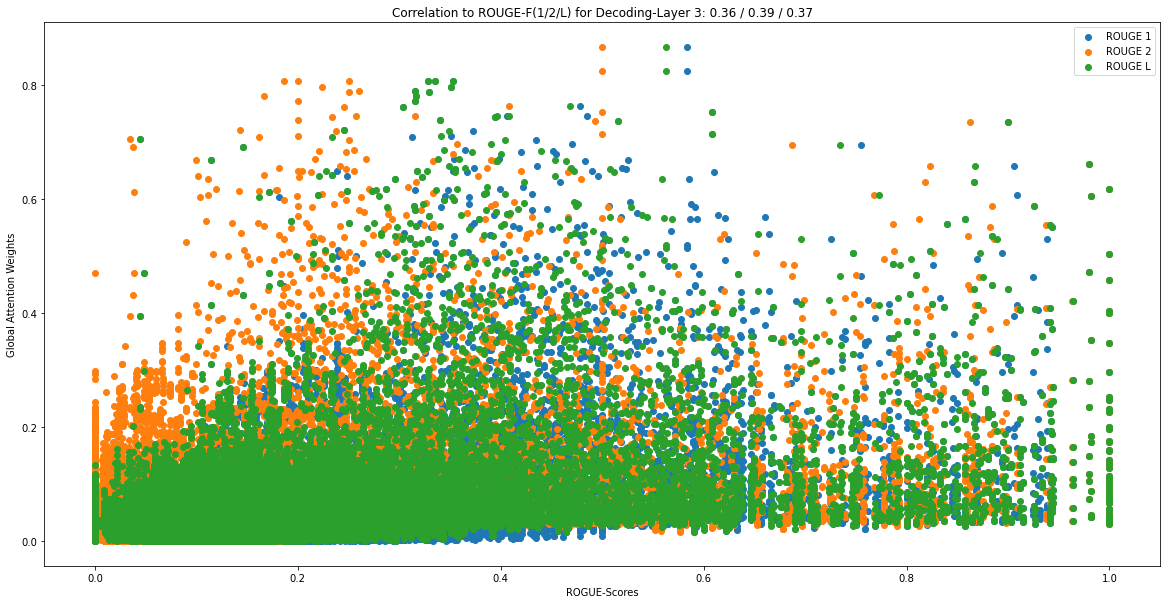

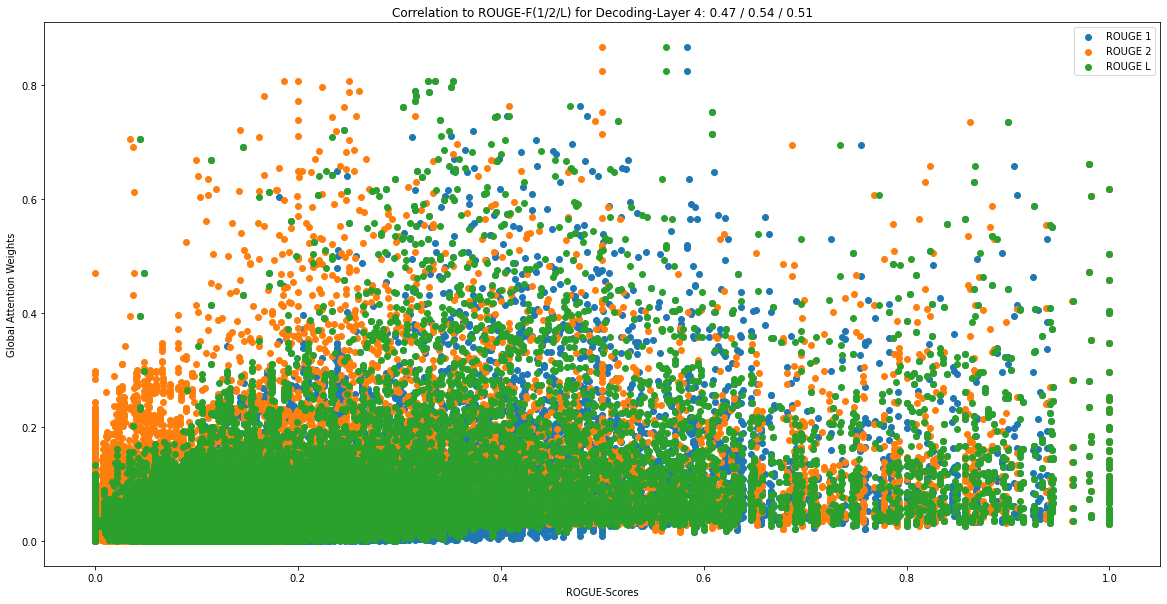

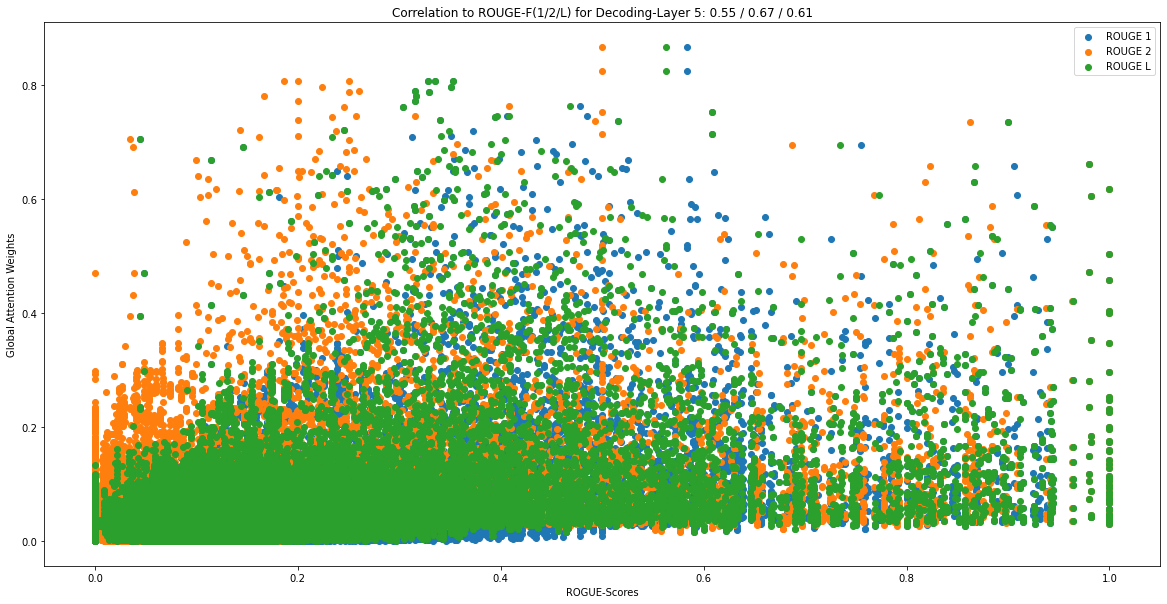

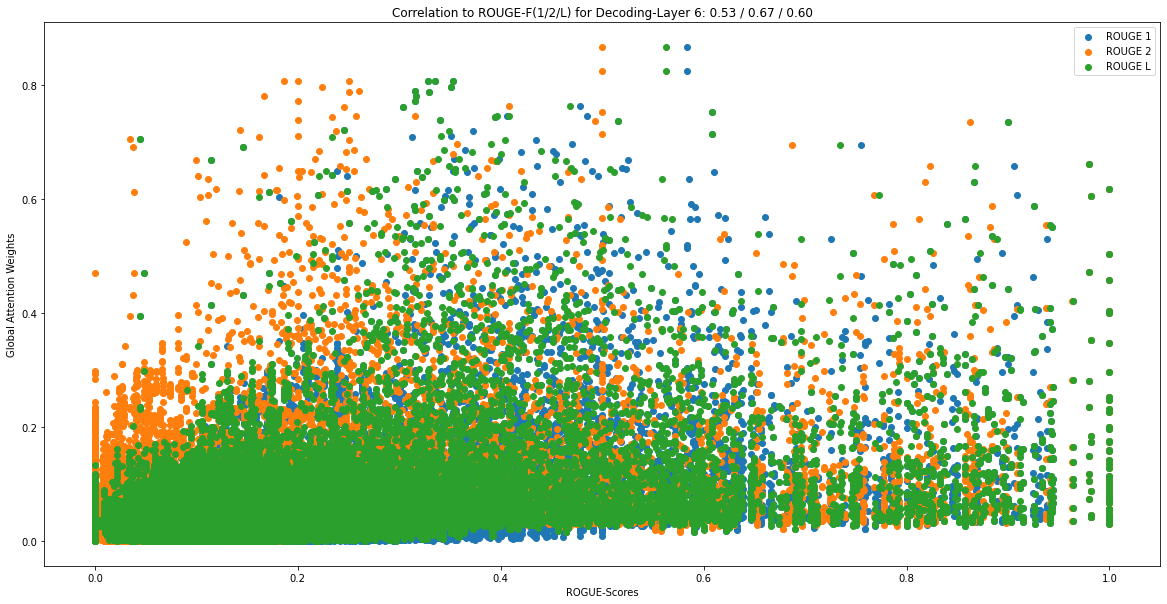

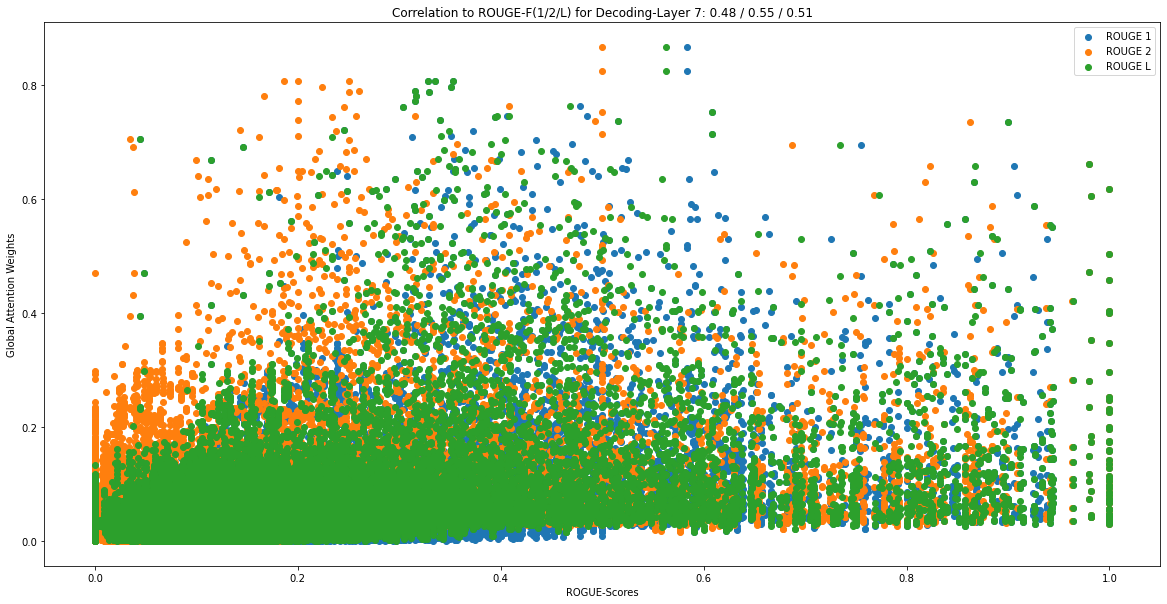

In [9]:
for i in range(8):
    plot_attention_rouge_correlation(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=i)

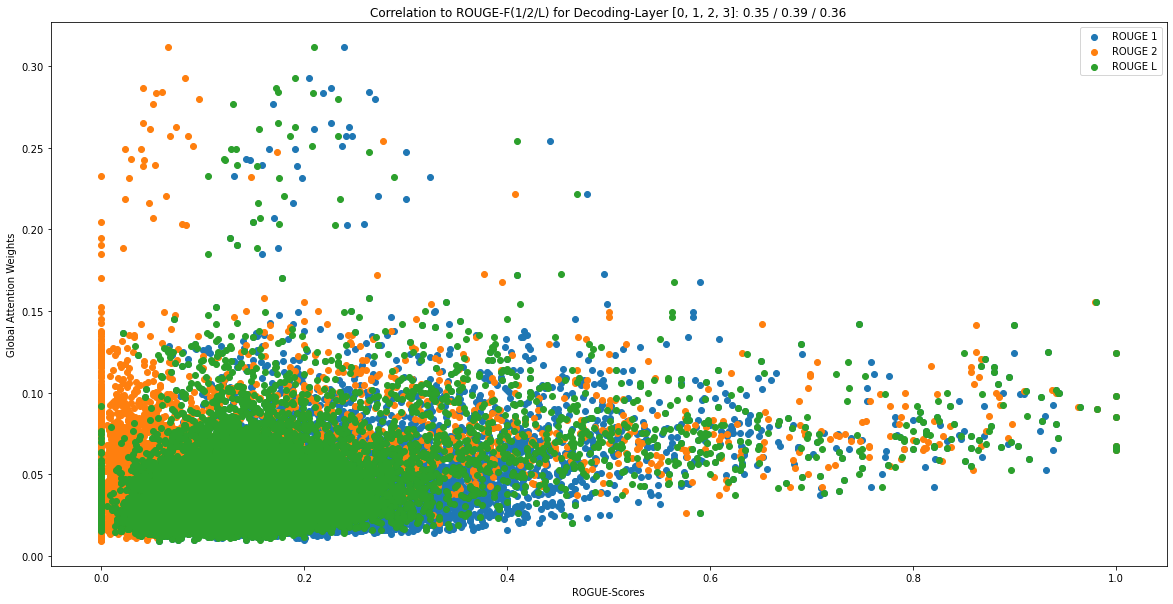

In [6]:
plot_attention_rouge_correlation(first_layers_correlation, r1["first"], r2["first"], rl["first"], attentions["first"], decoding_layer=[0,1,2,3], is_aggregated=True)

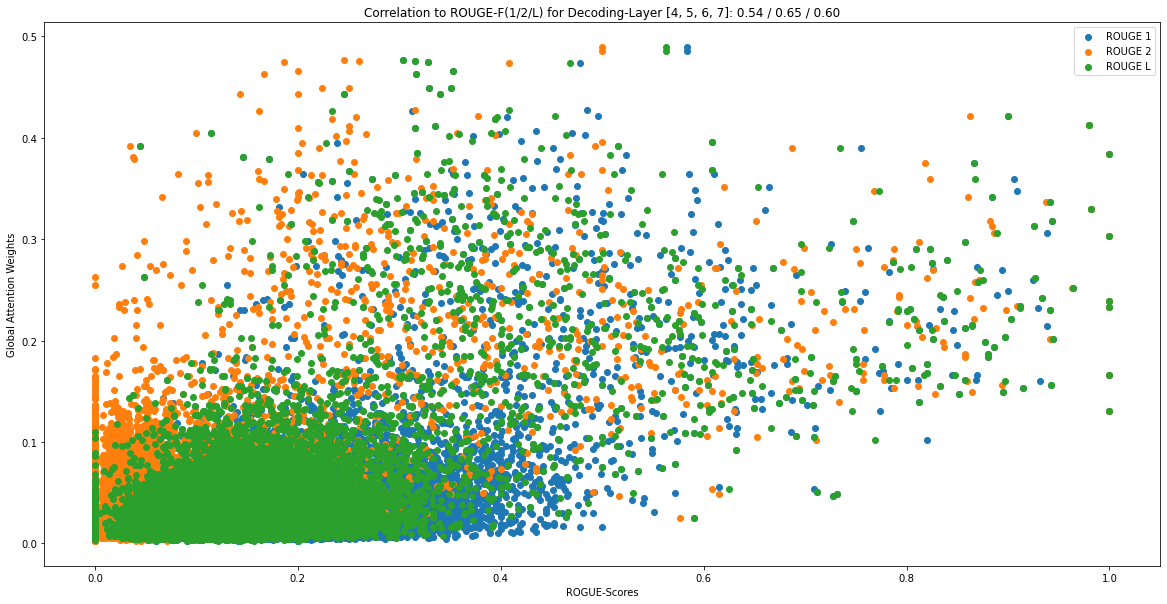

In [7]:
plot_attention_rouge_correlation(last_layers_correlation, r1["last"], r2["last"], rl["last"], attentions["last"], decoding_layer=[4,5,6,7], is_aggregated=True)